In [1]:
def update_media(x):
    if(x>=12):
        return 12
    else:
        return x

import pandas as pd
pd.options.mode.chained_assignment = None#disable warinings
data=pd.read_csv('Sayooj.csv')
data['is_verified']=data['is_verified'].replace({False : 0})#changing false and true to cressponding values
data['is_verified']=data['is_verified'].replace({True : 1})
data['is_private']=data['is_private'].replace({False : 0})
data['is_private']=data['is_private'].replace({True : 1})
data['is_professional_account']=data['is_professional_account'].replace({False : 0})
data['is_professional_account']=data['is_professional_account'].replace({True : 1})
data['has_anonymous_profile_picture']=data['has_anonymous_profile_picture'].replace({False : 0})
data['has_anonymous_profile_picture']=data['has_anonymous_profile_picture'].replace({True : 1})
data['has_clips']=data['has_clips'].replace({False : 0})
data['has_clips']=data['has_clips'].replace({True : 1})
data.fillna(0, inplace=True)#fill na values with 0
data.drop('username.1',inplace=True, axis=1)#removed extra column
data.drop('fbid',inplace=True, axis=1)#dropped irrelevant data
data.drop('seo_category_infos',inplace=True, axis=1)#dropped irrelevant data
data.drop('business_phone_number',inplace=True, axis=1)#dropped irrelevant data
data.drop('business_email',inplace=True, axis=1)#dropped irrelevant data
for i in range(0,len(data['username'])):#changed external url data to  0,1 if present then 1 else 0
    if(data['external_url'][i]!=0):
        data['external_url'][i]=1
        
data['name_length'] = data['full_name'].str.len()#created new feild called name_length ie length of username
data['media_count_of_data_collected']=data['media_count'].apply(lambda x: update_media(x))#because collected data was of first 12 posts
data['average_likes']=data['total_likes']/data['media_count_of_data_collected']
data.fillna(0, inplace=True)
data.to_csv('cleaned.csv',index=False)
data.head()

,username,full_name,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes
0,_kriiishnaaa____,Krishna Rajeev,0,0,23,1,920,694,1,6,0,1,44,12,4289,237,14.0,12,357.416667
1,sim.run03,Simran Kathpalia,0,0,27,0,374,379,0,6,0,1,14,17,1473,189,16.0,12,122.750000
2,sarang_dileep_,Sarang Dileep,0,0,0,0,476,554,0,0,0,1,9,1,1086,75,13.0,9,120.666667
3,krishna_manoj._,KRISHNA MANOJ✨,0,0,23,0,524,516,0,5,0,1,0,0,0,0,14.0,0,0.000000
4,ritka_098,Ritika,0,1,0,0,680,775,0,12,0,1,0,0,0,0,6.0,0,0.000000


# A

#### The dataset was collected from instagram using self written webscrapper.So there was need of modification.

# B

#### The dataset contains 501 samples of normal users account 

# C


#### there are 17 feature that can be used to identify if an account is fake or not


# Normalization

In [19]:
normalized=pd.read_csv('cleaned.csv')
normalized.drop('username',inplace=True,axis=1)
normalized.drop('full_name',inplace=True,axis=1)
normalized = normalized.iloc[:,1:]
x = normalized.iloc[:,1:]
normalized.iloc[:,1:] = (x-x.min())/ (x.max() - x.min())
data=normalized
data

,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes
0,0,0.153333,1.0,0.054467,0.137698,1.0,0.068182,0.0,1.0,0.098655,0.062176,0.156168,0.128664,0.358974,1.000000,0.156168
1,0,0.180000,0.0,0.021127,0.075198,0.0,0.068182,0.0,1.0,0.031390,0.088083,0.053634,0.102606,0.410256,1.000000,0.053634
2,0,0.000000,0.0,0.027355,0.109921,0.0,0.000000,0.0,1.0,0.020179,0.005181,0.039543,0.040717,0.333333,0.750000,0.052724
3,0,0.153333,0.0,0.030286,0.102381,0.0,0.056818,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.358974,0.000000,0.000000
4,1,0.000000,0.0,0.039812,0.153770,0.0,0.136364,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000
5,0,0.240000,1.0,0.053673,0.181746,1.0,0.125000,1.0,0.0,0.130045,0.088083,0.090446,0.066232,0.538462,1.000000,0.090446
6,0,0.186667,0.0,0.029187,0.096825,0.0,0.000000,0.0,1.0,0.029148,0.088083,0.058367,0.053203,0.564103,1.000000,0.058367
7,0,0.000000,0.0,0.089027,0.160516,0.0,0.136364,1.0,0.0,0.040359,0.424870,0.211768,0.124321,0.282051,1.000000,0.211768
8,0,0.213333,0.0,0.020456,0.085913,0.0,0.136364,0.0,1.0,0.011211,0.036269,0.035792,0.046145,0.205128,0.416667,0.085902
9,0,0.566667,0.0,0.024058,0.082738,1.0,0.136364,0.0,0.0,0.035874,0.259067,0.079886,0.255157,0.179487,1.000000,0.079886


# Graphs and data study 

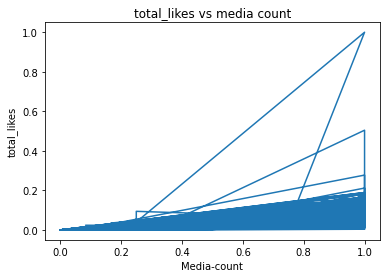

In [3]:
import matplotlib.pyplot as plt
x,y=data["media_count_of_data_collected"],data["total_likes"]
plt.plot(x, y)
plt.xlabel('Media-count')
plt.ylabel('total_likes')
plt.title('total_likes vs media count')
plt.show()

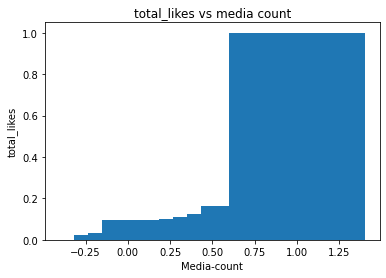

In [4]:
pd.options.mode.chained_assignment = None
x,y=data["media_count_of_data_collected"],data["total_likes"]
plt.bar(x, y)
plt.xlabel('Media-count')
plt.ylabel('total_likes')
plt.title('total_likes vs media count')
plt.show()

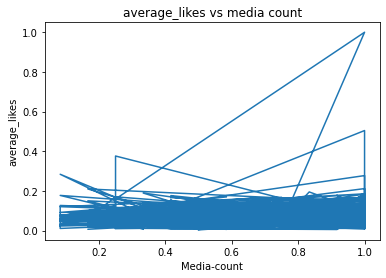

In [5]:
x,y=data["media_count_of_data_collected"],(data["total_likes"]/data["media_count_of_data_collected"])
plt.plot(x, y)
plt.xlabel('Media-count')
plt.ylabel('average_likes')
plt.title('average_likes vs media count')
plt.show()

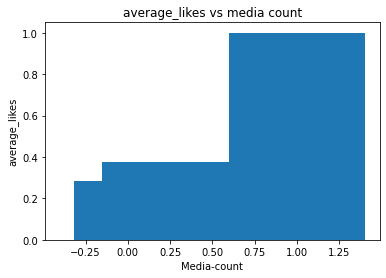

In [6]:
x,y=data["media_count_of_data_collected"],data["average_likes"]
plt.bar(x, y)
plt.xlabel('Media-count')
plt.ylabel('average_likes')
plt.title('average_likes vs media count')
plt.show()

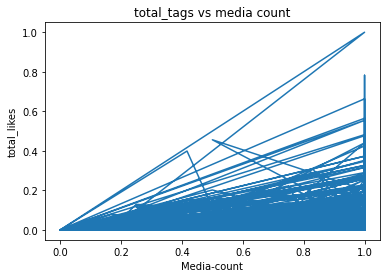

In [7]:
import matplotlib.pyplot as plt
x,y=data["media_count_of_data_collected"],data["total_tags"]
plt.plot(x, y)
plt.xlabel('Media-count')
plt.ylabel('total_likes')
plt.title('total_tags vs media count')
plt.show()

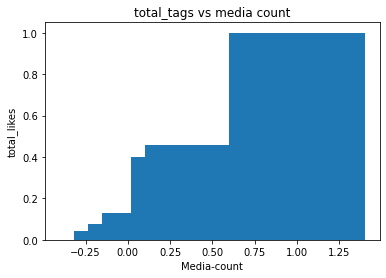

In [8]:
import matplotlib.pyplot as plt
x,y=data["media_count_of_data_collected"],data["total_tags"]
plt.bar(x, y)
plt.xlabel('Media-count')
plt.ylabel('total_likes')
plt.title('total_tags vs media count')
plt.show()

<AxesSubplot:>

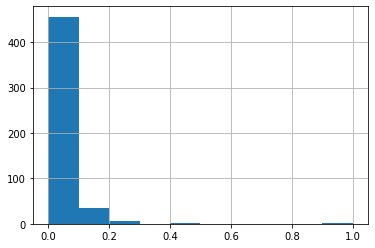

In [9]:
data.highlight_count.hist()

<AxesSubplot:>

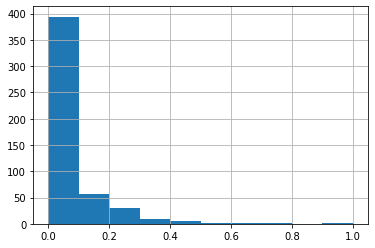

In [10]:
data.total_tags.hist()

<AxesSubplot:>

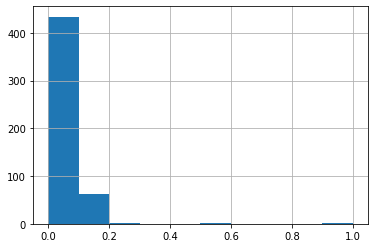

In [11]:
data.total_likes.hist()

<AxesSubplot:>

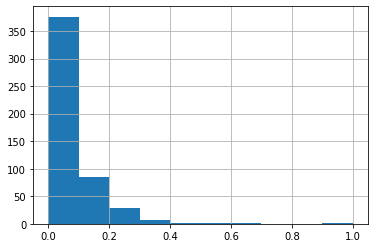

In [12]:
data.total_comments.hist()

<AxesSubplot:>

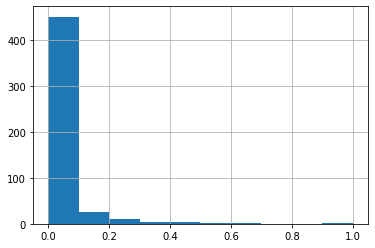

In [13]:
data.media_count.hist()

In [14]:
data.describe()

,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.02200,0.260573,0.084000,0.034005,0.113448,0.1420,0.034545,0.124000,0.694000,0.042368,0.063907,0.047933,0.064986,0.287590,0.552167,0.066643
std,0.14683,0.271988,0.277666,0.052196,0.084703,0.3494,0.065769,0.329912,0.461291,0.087373,0.110160,0.066913,0.095301,0.127379,0.411560,0.071888
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.006667,0.000000,0.016334,0.063938,0.0000,0.000000,0.000000,0.000000,0.002242,0.000000,0.004424,0.002172,0.179487,0.083333,0.013381
50%,0.00000,0.183333,0.000000,0.028149,0.101389,0.0000,0.011364,0.000000,1.000000,0.015695,0.020725,0.028237,0.030402,0.307692,0.583333,0.055910
75%,0.00000,0.380000,0.000000,0.042193,0.145635,0.0000,0.045455,0.000000,1.000000,0.042601,0.082902,0.075171,0.097991,0.358974,1.000000,0.097956
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.columns

Index(['has_anonymous_profile_picture', 'biography_len', 'external_url',
       'followers', 'following', 'has_clips', 'highlight_count',
       'is_professional_account', 'is_private', 'media_count', 'total_tags',
       'total_likes', 'total_comments', 'name_length',
       'media_count_of_data_collected', 'average_likes'],
      dtype='object')

# finding correlations 

<AxesSubplot:>

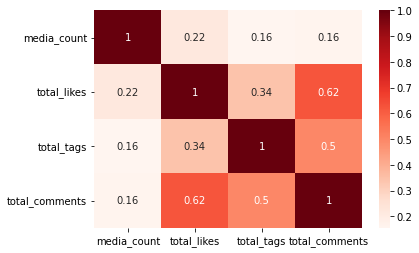

In [16]:
import seaborn as sns
cor=data[['media_count','total_likes','total_tags','total_comments']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

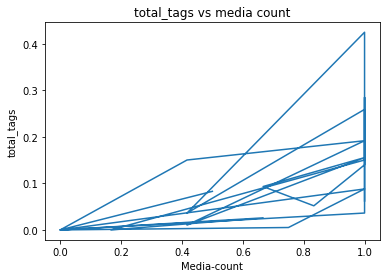

In [17]:
easy_graph=data.head(25)
x,y=easy_graph["media_count_of_data_collected"],easy_graph["total_tags"]
plt.plot(x, y)
plt.xlabel('Media-count')
plt.ylabel('total_tags')
plt.title('total_tags vs media count')
plt.show()

In [18]:
data.sum()

has_anonymous_profile_picture     11.000000
biography_len                    130.286667
external_url                      42.000000
followers                         17.002565
following                         56.723810
has_clips                         71.000000
highlight_count                   17.272727
is_professional_account           62.000000
is_private                       347.000000
media_count                       21.183857
total_tags                        31.953368
total_likes                       23.966574
total_comments                    32.492942
name_length                      143.794872
media_count_of_data_collected    276.083333
average_likes                     33.321581
dtype: float64

In [23]:
data.is_private.value_counts()

1.0    347
0.0    153
Name: is_private, dtype: int64

In [24]:
data.is_professional_account.value_counts()

0.0    438
1.0     62
Name: is_professional_account, dtype: int64

In [25]:
data.external_url.value_counts()

0.0    458
1.0     42
Name: external_url, dtype: int64

In [26]:
data.has_anonymous_profile_picture.value_counts()

0    489
1     11
Name: has_anonymous_profile_picture, dtype: int64

In [27]:
data.has_clips.value_counts()

0.0    429
1.0     71
Name: has_clips, dtype: int64

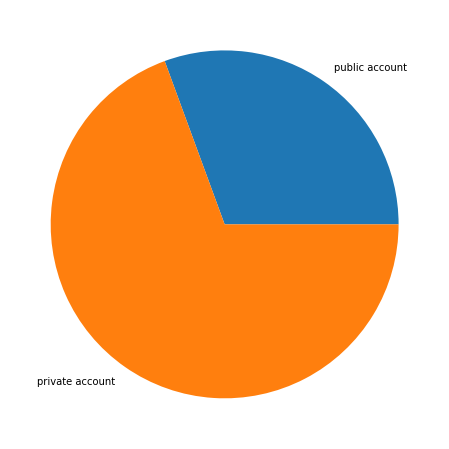

In [40]:
colors = ['red','blue']
explode= [1,1]
public,private=data.is_private.value_counts(0.0)[0],data.is_private.value_counts(0.0)[1]
plt.figure(figsize= (8,8))
plt.pie([public,private], labels=['public account', 'private account'])
plt.show()

In [39]:
data.is_private.value_counts(0.0)

1.0    347
0.0    153
Name: is_private, dtype: int64